<a href="https://colab.research.google.com/github/bahkali/A4Products/blob/master/HelloMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow import keras

In [74]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=['train', 'test'],

    as_supervised=True,
    shuffle_files=False,
    with_info=True,
)

print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [75]:
ds_info.splits['train'].num_examples

60000

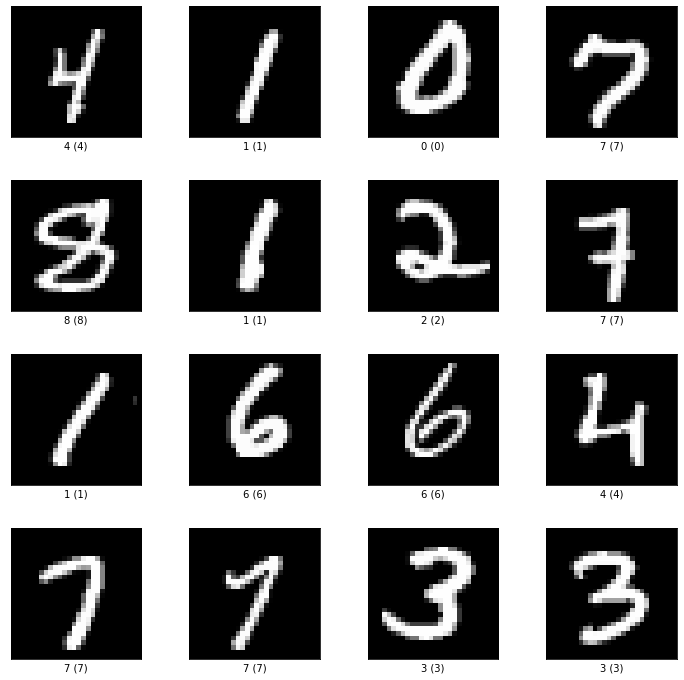

In [76]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [77]:
@tf.function
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

@tf.function
def augment(image, label):
  image = tf.image.resize(image, [28,28])
  image = tf.image.random_brightness(image, 0.2)
  image = tf.image.random_contrast(image, 0.5, 1.5)
  # image = tf.reshape(image, (28,28,1))
  return image, label


In [78]:
# Hyperparameter
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
ITEM_NUM = ds_info.splits['train'].num_examples

In [79]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE).cache()
ds_train = ds_train.shuffle(ITEM_NUM).batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(AUTOTUNE)

In [80]:
# Model 

def myModel():
  input =keras.Input(shape=(28,28,1))
  x = layers.Conv2D(32, 3)(input)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D()(x)

  x = layers.Conv2D(64, 3)(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.MaxPooling2D()(x)

  x = layers.Conv2D(128, 3)(x)
  x = layers.BatchNormalization()(x)
  x = keras.activations.relu(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation='relu')(x)
  output = layers.Dense(10, activation='softmax')(x)
  return keras.Model(inputs=input, outputs=output)

In [81]:
model1 =  myModel()
model1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [82]:
history = model1.fit(ds_train, epochs=50, verbose=5)
# import pandas as pd
# import matplotlib.pyplot as plt

# pd.DataFrame(history.history).plt

Epoch 1/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [88]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  # val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  # val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  # plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  # plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

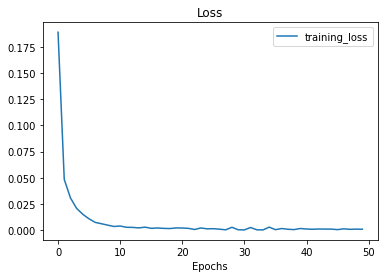

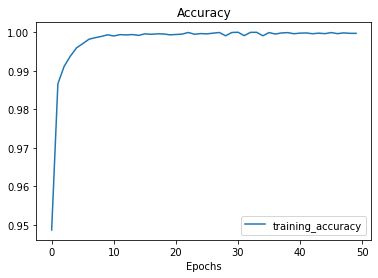

In [89]:
plot_loss_curves(history)

In [90]:
model1.evaluate(ds_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9920


[0.038484059274196625, 0.9919999837875366]

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
# safe model and convert it to TF Lite
model_path = "/content/drive/MyDrive/Models"
model1.save(model_path + "/mnistModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/mnistModel/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/mnistModel/assets


In [93]:
save_dir = "/content/drive/MyDrive/Models/mnistModel"
converter = tf.lite.TFLiteConverter.from_saved_model(save_dir)


In [94]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
model_lite = converter.convert()

b'(\x00\x00\x00TFL3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x00 \x00\x04\x00\x08\x00\x0c\x00\x10\x00\x14\x00\x00\x00\x18\x00\x1c\x00\x14\x00\x00\x00\x03\x00\x00\x00\x90)\x05\x00`\x1c\x05\x00H\x1c\x05\x00\xc8\x00\x00\x00\x90\x00\x00\x00\x04\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00\x0c\x00\x14\x00\x04\x00\x08\x00\x0c\x00\x10\x00\x0c\x00\x00\x00T\x00\x00\x00,\x00\x00\x00\x14\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00serve\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\xc0\xff\xff\xff\x08\x00\x00\x00\x14\x00\x00\x00\x08\x00\x00\x00dense_15\x00\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x82\xe3\xfa\xff\x04\x00\x00\x00\x07\x00\x00\x00input_9\x00\x01\x00\x00\x00\x0c\x00\x00\x00\x08\x00\x0c\x00\x04\x00\x08\x00\x08\x00\x00\x00\x08\x00\x00\x00\x16\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x17\x00\x00\x00t\x1b\x05\x00`\x1b\x05\x004\x1b\x05\x00\xa0\x1a\x05\x00|\x1a\x05\x00(\x1a\x05\x00\x94\x19\x05\x00\x80\x18\x05\x00l\xd8\x02\x00X\xd3\x02\x